<a href="https://colab.research.google.com/github/tchintchie/Flu/blob/master/Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
plt.rcParams["figure.figsize"]=10,12
import warnings
warnings.filterwarnings("ignore")

In [113]:
ytd_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
dbd_conf_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
dbd_death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
dbd_rec_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

s=requests.get(ytd_url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

s1=requests.get(dbd_conf_url).content
dbd_conf=pd.read_csv(io.StringIO(s1.decode('utf-8')))

s2=requests.get(dbd_death_url).content
dbd_death=pd.read_csv(io.StringIO(s2.decode('utf-8')))

s3=requests.get(dbd_rec_url).content
dbd_rec=pd.read_csv(io.StringIO(s3.decode('utf-8')))

df.head()

FIPS     Admin2  ... Active                   Combined_Key
0  45001.0  Abbeville  ...      0  Abbeville, South Carolina, US
1  22001.0     Acadia  ...      0          Acadia, Louisiana, US
2  51001.0   Accomack  ...      0         Accomack, Virginia, US
3  16001.0        Ada  ...      0                 Ada, Idaho, US
4  19001.0      Adair  ...      0                Adair, Iowa, US

[5 rows x 12 columns]

In [0]:
df.rename(columns={"Admin2":"City"},inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 12 columns):
FIPS              3148 non-null float64
City              3178 non-null object
Province_State    3265 non-null object
Country_Region    3439 non-null object
Last_Update       3439 non-null object
Lat               3439 non-null float64
Long_             3439 non-null float64
Confirmed         3439 non-null int64
Deaths            3439 non-null int64
Recovered         3439 non-null int64
Active            3439 non-null int64
Combined_Key      3439 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 322.5+ KB


In [116]:
totals = df.groupby("Country_Region")["Confirmed","Deaths","Recovered","Active"].sum().sort_values(by="Confirmed",ascending=False).head(10).style.background_gradient(cmap="Reds")
totals

In [117]:
map = folium.Map(zoom_start=4,tiles="Stamenterrain")
for lat, lon, value, name in zip(df.Lat, df.Long_, df.Deaths, df.Country_Region):
  folium.CircleMarker([lat,lon], radius=value*0.003,popup=("<strong>State</strong>: "+str(name).capitalize()+"<br>""<strong>Total Deaths</strong>: " +str(value)+"<br>"),color="red", fill_color="red",fill_opacity=0.3).add_to(map)

map


In [118]:
top20 = df.groupby("Country_Region")["Confirmed","Deaths","Recovered","Active"].sum().sort_values(by="Confirmed",ascending=False).head(20)
top20

Confirmed  Deaths  Recovered  Active
Country_Region                                      
US                 161807    2978       5644       0
Italy              101739   11591      14620   75528
Spain               87956    7716      16780   63460
China               82198    3308      75923    2967
Germany             66885     645      13500   52740
France              45170    3030       7964   34176
Iran                41495    2757      13911   24827
United Kingdom      22453    1411        171   20871
Switzerland         15922     359       1823   13740
Belgium             11899     513       1527    9859
Netherlands         11817     865        253   10699
Turkey              10827     168        162   10497
Korea, South         9661     158       5228    4275
Austria              9618     108        636    8874
Canada               7398      80        466       0
Portugal             6408     140         43    6225
Israel               4695      16        161    4518
Brazil               4579     159        120    4300
Norway               4445      32         12    4401
Australia            4361      17        257    4087

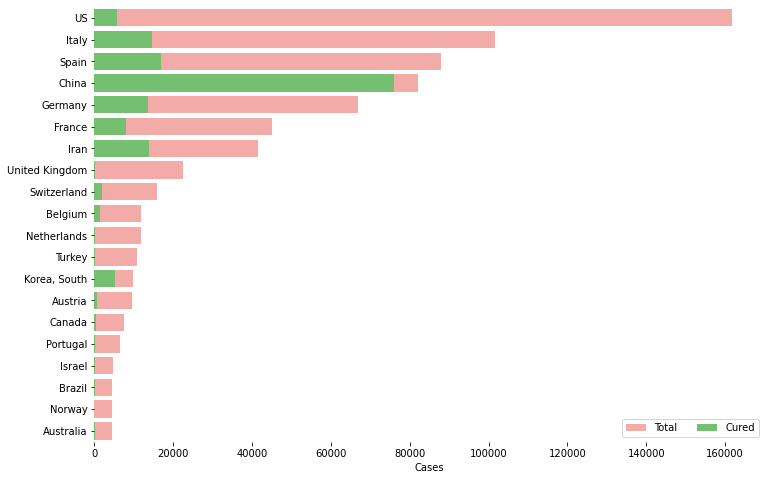

In [119]:
fig, ax = plt.subplots(figsize=(12,8))
top20.sort_values("Confirmed", ascending=False, inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed",y=top20.index, data = top20, label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y= top20.index, data = top20, label="Cured", color="g")
ax.legend(ncol=2, loc="lower right", frameon = True)
ax.set(ylabel="", xlabel="Cases")
sns.despine(left=True, bottom=True)

In [120]:
dbd_conf["Status"] = "Confirmed"
dbd_conf.head()

Province/State Country/Region      Lat  ...  3/29/20  3/30/20     Status
0            NaN    Afghanistan  33.0000  ...      120      170  Confirmed
1            NaN        Albania  41.1533  ...      212      223  Confirmed
2            NaN        Algeria  28.0339  ...      511      584  Confirmed
3            NaN        Andorra  42.5063  ...      334      370  Confirmed
4            NaN         Angola -11.2027  ...        7        7  Confirmed

[5 rows x 74 columns]

In [0]:
dbd_death["Status"] = "Diseased"

In [0]:
dbd_rec["Status"] = "Recovered"

In [0]:
dbd_conf = dbd_conf.melt(id_vars=["Province/State", "Country/Region","Lat","Long","Status"],var_name="Date", value_name="Value")
dbd_death = dbd_death.melt(id_vars=["Province/State", "Country/Region","Lat","Long","Status"],var_name="Date", value_name="Value")
dbd_rec = dbd_rec.melt(id_vars=["Province/State", "Country/Region","Lat","Long","Status"],var_name="Date", value_name="Value")


In [0]:
dbd_rec.Date = pd.to_datetime(dbd_rec.Date)
dbd_conf.Date = pd.to_datetime(dbd_conf.Date)
dbd_death.Date = pd.to_datetime(dbd_death.Date)

In [0]:
austria = dbd_conf[dbd_conf["Country/Region"]=="Austria"]
usa = dbd_conf[dbd_conf["Country/Region"]=="US"]
italy = dbd_conf[dbd_conf["Country/Region"]=="Italy"]

In [0]:
import plotly
plotly.io.renderers.default = "colab"

In [127]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=austria.Date, y= austria.Value,mode="lines+markers",name="Total Cases Austria"))
fig.add_trace(go.Scatter(x=usa.Date, y= usa.Value,mode="lines+markers",name="Total Cases USA"))
fig.add_trace(go.Scatter(x=italy.Date, y= italy.Value,mode="lines+markers",name="Total Cases Italy"))

fig.update_layout(title_text="Trend of Coronavirus Cases in Austria, Italy and USA", plot_bgcolor="rgb(230,230,230)")
fig.show()

In [128]:
fig = px.bar(austria, x="Date",y="Value", color="Value", orientation="v", height=600, title="Confirmed Cases in Austria", color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.show()

fig = px.bar(usa, x="Date",y="Value", color="Value", orientation="v", height=600, title="Confirmed Cases in America", color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.show()

In [129]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 2, cols = 2, specs=[[{},{}],[{"colspan":2},None]],subplot_titles=("Italy", "USA","Austria"))

fig.add_trace(go.Bar(x=italy.Date, y=italy.Value, marker = dict(color=italy.Value, coloraxis="coloraxis")),1,1)
fig.add_trace(go.Bar(x=usa.Date, y=usa.Value, marker = dict(color=usa.Value, coloraxis="coloraxis")),1,2)
fig.add_trace(go.Bar(x=austria.Date, y=austria.Value, marker = dict(color=austria.Value, coloraxis="coloraxis")),2,1)

fig.update_layout(coloraxis=dict(colorscale="Bluered_r"), showlegend=False, title_text = "Total Confimred Cases")
fig.update_layout(plot_bgcolor="rgb(230,230,230)")
fig.show()


# Trend after surpassing 100 cases

In [130]:
italy100 = italy[italy.Value >=100].copy()
italy100 = italy100.reset_index()
italy100

usa100 = usa[usa.Value >=100].copy()
usa100 = usa100.reset_index()
usa100

aut100 = austria[austria.Value >=100].copy()
aut100 = aut100.reset_index()
aut100

index Province/State Country/Region  ...     Status       Date Value
0   11700            NaN        Austria  ...  Confirmed 2020-03-08   104
1   11954            NaN        Austria  ...  Confirmed 2020-03-09   131
2   12208            NaN        Austria  ...  Confirmed 2020-03-10   182
3   12462            NaN        Austria  ...  Confirmed 2020-03-11   246
4   12716            NaN        Austria  ...  Confirmed 2020-03-12   302
5   12970            NaN        Austria  ...  Confirmed 2020-03-13   504
6   13224            NaN        Austria  ...  Confirmed 2020-03-14   655
7   13478            NaN        Austria  ...  Confirmed 2020-03-15   860
8   13732            NaN        Austria  ...  Confirmed 2020-03-16  1018
9   13986            NaN        Austria  ...  Confirmed 2020-03-17  1332
10  14240            NaN        Austria  ...  Confirmed 2020-03-18  1646
11  14494            NaN        Austria  ...  Confirmed 2020-03-19  2013
12  14748            NaN        Austria  ...  Confirmed 2020-03-20  2388
13  15002            NaN        Austria  ...  Confirmed 2020-03-21  2814
14  15256            NaN        Austria  ...  Confirmed 2020-03-22  3582
15  15510            NaN        Austria  ...  Confirmed 2020-03-23  4474
16  15764            NaN        Austria  ...  Confirmed 2020-03-24  5283
17  16018            NaN        Austria  ...  Confirmed 2020-03-25  5588
18  16272            NaN        Austria  ...  Confirmed 2020-03-26  6909
19  16526            NaN        Austria  ...  Confirmed 2020-03-27  7657
20  16780            NaN        Austria  ...  Confirmed 2020-03-28  8271
21  17034            NaN        Austria  ...  Confirmed 2020-03-29  8788
22  17288            NaN        Austria  ...  Confirmed 2020-03-30  9618

[23 rows x 8 columns]

In [131]:
title = "Day after Case 100"
labels = ["Italy","USA","Austria"]
colors = ["rgb(122,128,0)","rgb(255,0,0)","rgb(49,130,189)"]

mode_size = [10,10,12]
line_size = [1,1,8]

fig = go.Figure()

fig.add_trace(go.Scatter(x = italy100.index, y = italy100.Value, mode="lines", name=labels[0], line=dict(color = colors[0], width = line_size[0]), connectgaps=True))
fig.add_trace(go.Scatter(x = usa100.index, y = usa100.Value, mode="lines", name=labels[1], line=dict(color = colors[1], width = line_size[1]), connectgaps=True))
fig.add_trace(go.Scatter(x = aut100.index, y = aut100.Value, mode="lines", name=labels[2], line=dict(color = colors[2], width = line_size[2]), connectgaps=True))


annotations = []

annotations.append(dict(xref = "paper", yref="paper", x=0.5, y=-0.1, xanchor = "center", yanchor = "top", text = "Days after patient 100", font=dict(family="Arial", size=12,color="rgb(150,150,150)"), showarrow=False))

fig.update_layout(annotations=annotations, plot_bgcolor="white", yaxis_title="Cumulative Cases")
fig.show()

In [0]:
confirmed = dbd_conf.groupby("Date").sum()["Value"].reset_index()
deaths = dbd_death.groupby("Date").sum()["Value"].reset_index()
recovered = dbd_rec.groupby("Date").sum()["Value"].reset_index()

In [133]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed.index, y= confirmed.values,mode="lines+markers",name="Total Confirmed Cases"))
fig.add_trace(go.Scatter(x=deaths.index, y= deaths.values,mode="lines+markers",name="Total Deaths"))
fig.add_trace(go.Scatter(x=recovered.index, y= recovered.values,mode="lines+markers",name="Total Recoveries"))

fig.update_layout(title_text="Trend of Coronavirus Cases worldwide", plot_bgcolor="rgb(230,230,230)")
fig.show()

In [139]:
from fbprophet import Prophet
confirmed = confirmed.reset_index()
confirmed = confirmed.rename(columns={"Date":"ds","Value":"y"})
confirmed.head()


index         ds     y
0      0 2020-01-22   555
1      1 2020-01-23   654
2      2 2020-01-24   941
3      3 2020-01-25  1434
4      4 2020-01-26  2118

In [140]:
confirmed = confirmed.drop("index", axis = 1)
confirmed.head()

ds     y
0 2020-01-22   555
1 2020-01-23   654
2 2020-01-24   941
3 2020-01-25  1434
4 2020-01-26  2118

In [141]:
confirmed.tail()

ds       y
64 2020-03-26  529591
65 2020-03-27  593291
66 2020-03-28  660706
67 2020-03-29  720117
68 2020-03-30  782365

In [142]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods = 7)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
71 2020-04-02
72 2020-04-03
73 2020-04-04
74 2020-04-05
75 2020-04-06

In [143]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds           yhat     yhat_lower     yhat_upper
71 2020-04-02  717294.586850  651793.386548  782912.807272
72 2020-04-03  748735.322570  685733.023717  814736.172357
73 2020-04-04  779952.330175  706326.121958  846398.169260
74 2020-04-05  810653.257745  741984.433619  879565.885016
75 2020-04-06  842535.395406  768779.775643  910091.735348

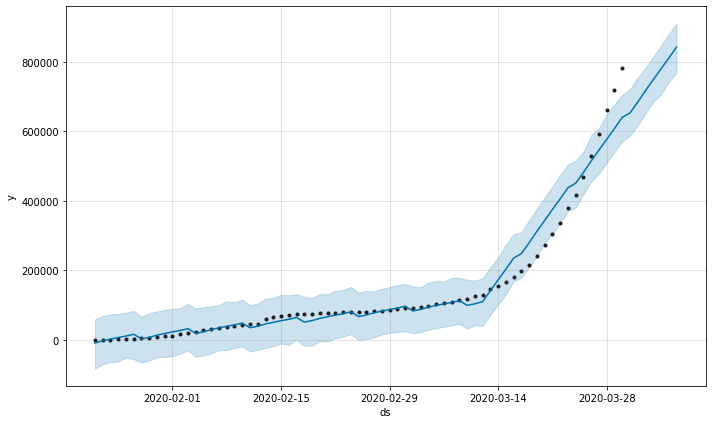

In [144]:
confirmed_forecast_plot = m.plot(forecast)

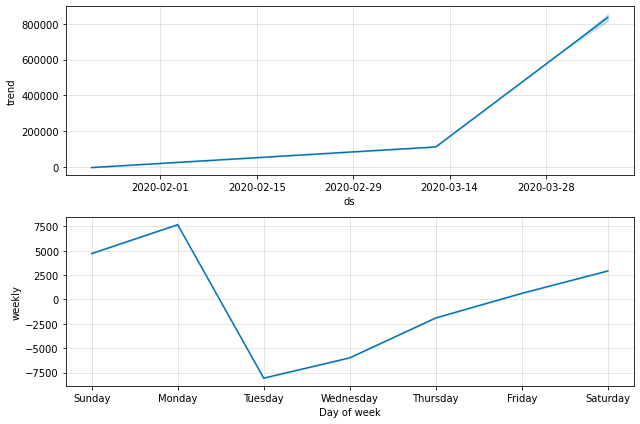

In [145]:
confirmed_forecast_plot = m.plot_components(forecast)

In [146]:
deaths = deaths.reset_index()
deaths = deaths.rename(columns={"Date":"ds","Value":"y"})
deaths.head()

index         ds   y
0      0 2020-01-22  17
1      1 2020-01-23  18
2      2 2020-01-24  26
3      3 2020-01-25  42
4      4 2020-01-26  56

In [147]:
deaths = deaths.drop("index", axis = 1)
deaths.tail()

ds      y
64 2020-03-26  23970
65 2020-03-27  27198
66 2020-03-28  30652
67 2020-03-29  33925
68 2020-03-30  37582

In [148]:
d = Prophet(interval_width=0.95)
d.fit(deaths)
future_d = m.make_future_dataframe(periods = 7)
future_d.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
71 2020-04-02
72 2020-04-03
73 2020-04-04
74 2020-04-05
75 2020-04-06

In [149]:
forecast_d = m.predict(future_d)
forecast_d[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds           yhat     yhat_lower     yhat_upper
71 2020-04-02  717294.586850  651848.552063  782893.709680
72 2020-04-03  748735.322570  678315.186558  818234.125027
73 2020-04-04  779952.330175  709328.800115  848232.165173
74 2020-04-05  810653.257745  739239.910081  875121.802432
75 2020-04-06  842535.395406  776162.790635  918010.734765

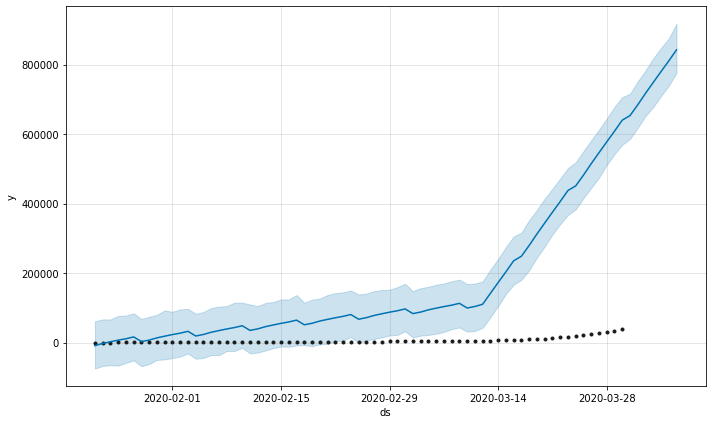

In [150]:
death_forecast_plot = d.plot(forecast_d)

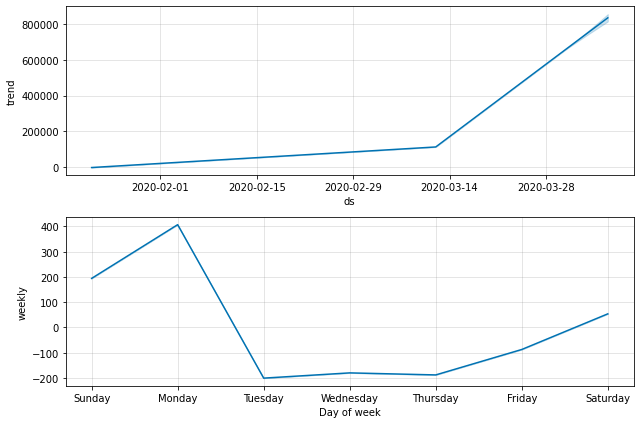

In [151]:
death_forecast_plot = d.plot_components(forecast_d)